# Is the weather becoming worse?

### Author: Shijia Zhang

In this visualization, two datasets,US weather events dataset and federal disasters dataset are used to show the distribution and frequency of severe weather events in different areas of the US.

In [1]:
import pandas as pd
import bqplot
import numpy as np
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('US_WeatherEvents_2016-2019.csv')

In [3]:
data = data[data['Severity']=='Severe']

In [4]:
# create a new column to store the start year of events
data['Year'] = data['StartTime(UTC)'].apply(lambda x: x[:4])

In [5]:
data_state = data.groupby('State',as_index = False).count()[['State', 'EventId']]

Text(0, 0.5, 'Frequency of Severe Events')

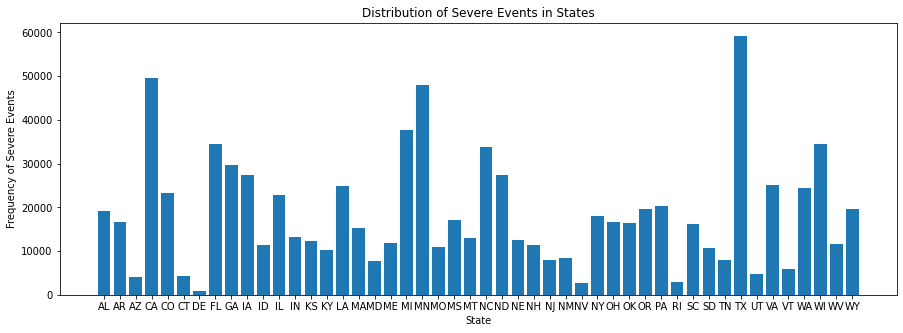

In [6]:
plt.figure(figsize = (15,5))
plt.bar(data_state['State'],data_state['EventId'])
plt.title('Distribution of Severe Events in States')
plt.xlabel('State')
plt.ylabel('Frequency of Severe Events')

The plot above shows the distribution of severe weather events in every states from 2016 to 2019. The x axis is the two letter code of states and the y axis is the number of events happened in each state. This distribution can help us to gain a overall understanding of the weather condition in different area across the US. From this plot we can learn that in the past 5 years, Taxes, Minnesota, Michigan, California are the states where severe weather events most frequently happen, while Delaware, Nevada, Rhode Island are the states with least frequency of severe weather events.

In [7]:
data_year = data.groupby('Year',as_index = False).count()[['Year', 'EventId']]

Text(0, 0.5, 'Frequency of Severe Events')

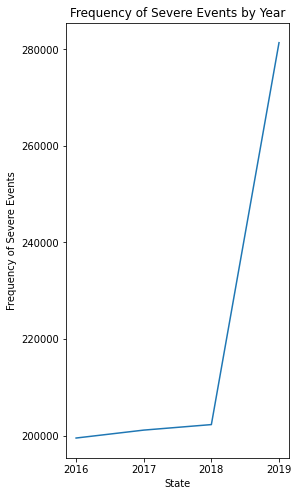

In [8]:
plt.figure(figsize = (4,8))
plt.plot(data_year['Year'],data_year['EventId'])
plt.title('Frequency of Severe Events by Year')
plt.xlabel('State')
plt.ylabel('Frequency of Severe Events')

The plot shows the frequency of severe weather event in the US in the past 4 years. As we can read from the plot, The number of severe weather event happened was increasing. 

In [9]:
data['Year'] = data['Year'].astype('category')

In [10]:
nums = data[['State', 'Year', 'Type', 'EventId']].groupby(['Year', 'State', 'Type'], as_index = False).count().reset_index()
nums.rename(columns={'EventId':'Nums'},inplace=True)
nums['Nums'] = nums['Nums'].fillna(0).astype('int')

In [11]:
years = sorted(list(set(nums['Year'])))

In [12]:
types = ['Fog', 'Cold', 'Storm']

In [13]:
# this part is from the states_utils.py on the course website
def get_ids_and_names(states_map):
    ids = []
    state_names = []
    state_data_vec = states_map.map_data['objects']['subunits']['geometries']
    for i in range(len(state_data_vec)):
        if state_data_vec[i]['properties'] is not None:
            state_names.append(state_data_vec[i]['properties']['name'])
            ids.append(state_data_vec[i]['id'])
    return np.array(ids), np.array(state_names)

In [14]:
# We need to convert the 2 letter state code into full name.
# This dictionary is from http://code.activestate.com/recipes/577305-python-dictionary-of-us-states-and-territories/
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [15]:
new_states = {}
for key in states.keys():
    new_states[states[key]] = key

In [16]:
# This part of code is adepted from the spring2019_prep_notebook_week06_part2.py on the course website

sc_geo = bqplot.AlbersUSA()
state_data = bqplot.topo_load('map_data/USStatesMap.json')

def_tt = bqplot.Tooltip(fields=['id', 'name'])

states_map = bqplot.Map(map_data=state_data, scales={'projection':sc_geo}, tooltip=def_tt)
states_map.interactions = {'click': 'select', 'hover': 'tooltip'}

ids, state_names = get_ids_and_names(states_map)

fig=bqplot.Figure(marks=[states_map], title='US States Map',
                  fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0})

x_scl = bqplot.OrdinalScale() 
y_scl = bqplot.LinearScale(min=0, max=0)
ax_xcl = bqplot.Axis(label='Year', scale=x_scl)
ax_ycl = bqplot.Axis(label='Total Number of Events from State NA', 
                     scale=y_scl, 
                    orientation='vertical', side='left')
lines = [
bqplot.Lines(x = years, y = np.zeros(len(years)),
                    scales = {'x': x_scl, 'y': y_scl}, colors = ['red'], display_legend = True, labels = [types[0]]),
bqplot.Lines(x = years, y = np.zeros(len(years)),
                    scales = {'x': x_scl, 'y': y_scl}, colors = ['green'], display_legend = True, labels = [types[1]]),
bqplot.Lines(x = years, y = np.zeros(len(years)),
                    scales = {'x': x_scl, 'y': y_scl}, display_legend = True, labels = [types[2]])]


fig_lines = bqplot.Figure(marks = lines, title = 'Number of Severe Weather Events',
                          axes = [ax_ycl, ax_xcl],)

def get_data_value(change):
    if change['owner'].selected is not None:
        for j in range(len(types)):  # for different type of event, plot a single line
            snames = ''
            total_numbers = np.zeros(len(years))
            for i,s in enumerate(change['owner'].selected):
                sn = state_names[s == ids][0]  # state name
                snames += sn + ', '  # all state names
                numbers = np.array(nums.loc[(nums['State'] == new_states[sn]) & (nums['Type'] == types[j])]['Nums'])  # num of events in select state
                if len(numbers):  # for the states with no data, ignore to avoid error
                    total_numbers = np.add(total_numbers, numbers.astype('float64'))
            lines[j].y = total_numbers
        # change the max limit of y axis
        y_scl.max =max(max(lines[0].y),max(lines[1].y),max(lines[2].y))
        ax_ycl.label='Total Number of Events from ' + snames
    else:
        for i in range(len(lines)):
            lines[i].y = np.zeros(len(years))
        ax_ycl.label='Total Number of Events from NA'

states_map.observe(get_data_value,'selected')

fig_lines.layout.min_width='500px'
fig.layout.min_width='500px'
ipywidgets.HBox([fig,fig_lines])

This dashboard allows user to explore how the frequency of different severe weather events changed from 2016 to 2019 in the areas they are interested in.

The left portion of the dashboard is a map of the US, which enables users to select one or more states by clicking. The right portion of the dashboard shows the corresponding line plot of the number of severe weather events in the state selected. There are three kinds of weather events recorded in the dataset, fog, cold and storm, which are shown in red, blue and green in the line plot. The x axis is year and the y axis is the total number of severe weather events in the state. When mutiple states are selected from the map, the line plot is showing the total event number of all the states selected.

As shown in this visualization, In the three types of severe weather events, the fog is the most common event and the storm is the most uncommon one. For most states in the US, despite the fluctuations, the frequency of severe weather events was increasing from 2016 to 2019.

The dataset federal-disaster is dataset including the records of federal disasters and emergencies declared by the president of United States from 1950 to 2017. This dataset has a relative long time span, which can help us to deeper understand the variation of the frequency of severe natural events.

In [17]:
disasters = pd.read_csv('federal-disasters.csv')

In [18]:
disasters['Year'] = disasters['Start Date'].apply(lambda x: int(x[-4:]))

In [19]:
# Since we only care about the natural events, select all the record with declaration type disaster and ignore the emergencies.
disasters = disasters[(disasters['Year'] < 2017) & (disasters['Declaration Type']=='Disaster')]

In [20]:
disasters_year = disasters.groupby('Year',as_index = False).count()[['Year', 'Declaration Number']]

Text(0, 0.5, 'Frequency of Federal Disasters')

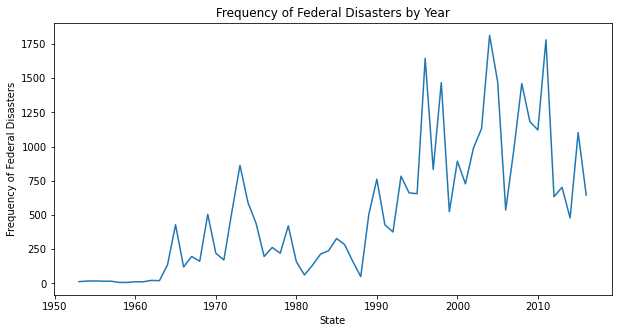

In [21]:
plt.figure(figsize = (10,5))
plt.plot(disasters_year['Year'], disasters_year['Declaration Number'])
plt.title('Frequency of Federal Disasters by Year')
plt.xlabel('State')
plt.ylabel('Frequency of Federal Disasters')

The plot above shows the variation of the frequency of federal disasters from 1950 to 2017. The x axis is the year and the y axis is the frequency. As shown in the plot, although there were fluctuations, there is an increasing trend in the frequency of federal disaster, which correspond to the trend shown in the severe weather event dataset.

## Datasets:

US Weather Events (2016 - 2019): https://www.kaggle.com/sobhanmoosavi/us-weather-events/version/1


Federal Emergencies and Disasters, 1953-Present: https://www.kaggle.com/fema/federal-disasters